In [2]:

import os
import cv2
import random
import yaml
from ultralytics import YOLO

import matplotlib.pyplot as plt


In [3]:
img = '/Users/verakabanova/Downloads/archive (7)/images'
lab = '/Users/verakabanova/Downloads/archive (7)/labels'


🔍 Проверка: ТРЕНИРОВОЧНЫЙ НАБОР (train)
📷 Изображений: 13386
📝 Файлов разметки: 13386
✅ Все изображения имеют соответствующие файлы разметки!

🔍 Проверка: ВАЛИДАЦИОННЫЙ НАБОР (val)
📷 Изображений: 3347
📝 Файлов разметки: 3347
✅ Все изображения имеют соответствующие файлы разметки!

👁️  Визуализация 3 случайных изображений:

   Изображение: 3696ab9933ba1831.jpg | Объектов: 1


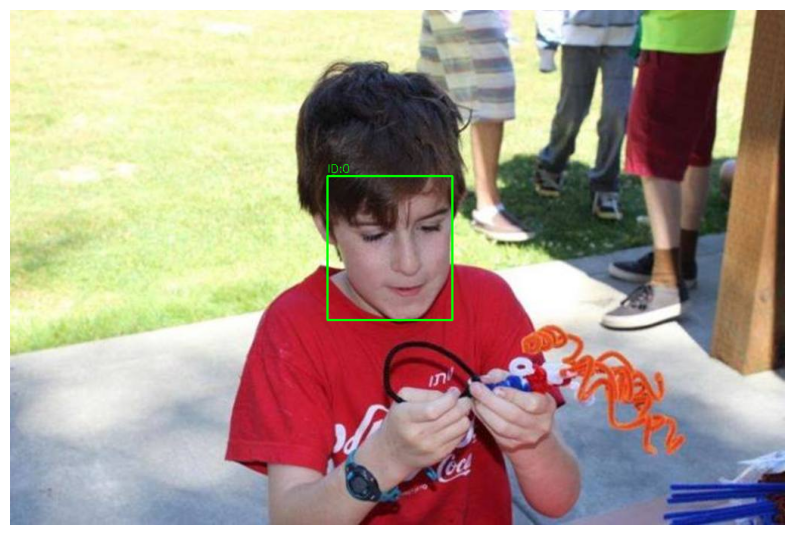


   Изображение: 686c8b82ee5556a2.jpg | Объектов: 2


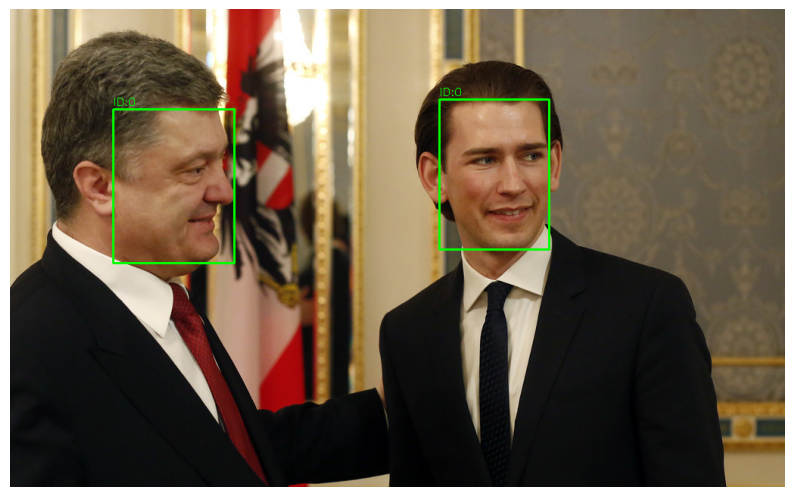


   Изображение: 14827666fed87ee0.jpg | Объектов: 5


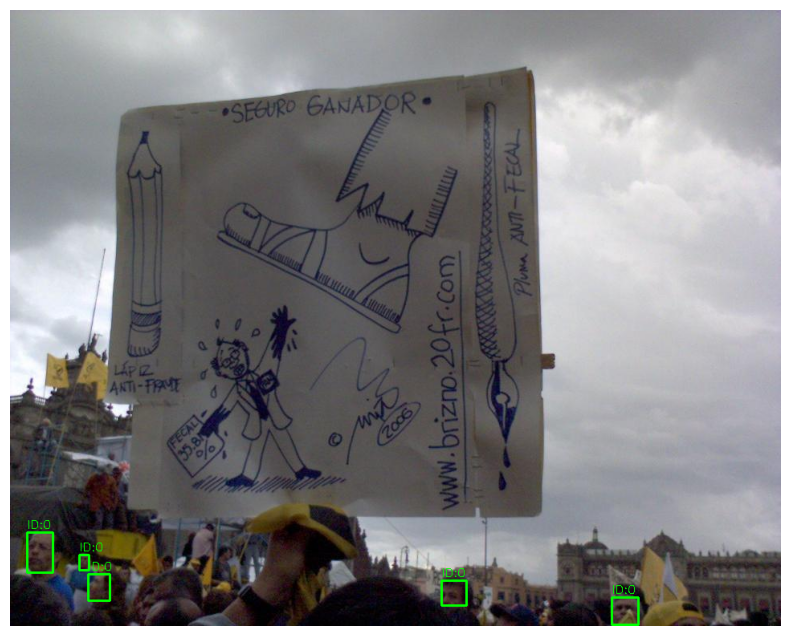


📊 ИТОГОВАЯ СТАТИСТИКА ДАТАСЕТА
Всего тренировочных изображений: 13386
Всего валидационных изображений: 3347
Всего изображений: 16733
Всего файлов разметки train: 13386
Всего файлов разметки val: 3347
Пропущенных пар (train): 0
Пропущенных пар (val): 0

✅ Найден файл конфигурации data.yaml
Содержимое data.yaml:
train: /Users/verakabanova/Downloads/archive (7)/images/train
val: /Users/verakabanova/Downloads/archive (7)/images/val
nc: 1
names:
- face



In [4]:


# ==================== ПУТИ К ДАННЫМ ====================
base_path = '/Users/verakabanova/Downloads/archive (7)'
train_images_dir = os.path.join(base_path, 'images', 'train')
train_labels_dir = os.path.join(base_path, 'labels', 'train')
val_images_dir = os.path.join(base_path, 'images', 'val')
val_labels_dir = os.path.join(base_path, 'labels', 'val')

# ==================== ФУНКЦИЯ ПРОВЕРКИ ====================
def check_dataset(images_dir, labels_dir, dataset_name="Набор данных"):
    print(f"\n{'='*50}")
    print(f"🔍 Проверка: {dataset_name}")
    print(f"{'='*50}")
    
    image_files = sorted([f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
    label_files = sorted([f for f in os.listdir(labels_dir) if f.endswith('.txt')])

    print(f"📷 Изображений: {len(image_files)}")
    print(f"📝 Файлов разметки: {len(label_files)}")

    missing_pairs = []
    for img in image_files:
        label_name = os.path.splitext(img)[0] + '.txt'
        if label_name not in label_files:
            missing_pairs.append(img)

    if missing_pairs:
        print(f"⚠️  Предупреждение: для {len(missing_pairs)} изображений нет парных .txt файлов")
    else:
        print("✅ Все изображения имеют соответствующие файлы разметки!")

    return image_files, label_files, len(missing_pairs)

# ==================== ВИЗУАЛИЗАЦИЯ (исправленная) ====================
def visualize_random_samples(images_dir, labels_dir, image_files, num_samples=3):
    """Показывает случайные изображения с bounding boxes через matplotlib."""
    print(f"\n👁️  Визуализация {num_samples} случайных изображений:")

    for i in range(num_samples):
        img_name = random.choice(image_files)
        label_name = os.path.splitext(img_name)[0] + '.txt'

        img_path = os.path.join(images_dir, img_name)
        label_path = os.path.join(labels_dir, label_name)

        img = cv2.imread(img_path)
        if img is None:
            print(f"   Не удалось загрузить: {img_name}")
            continue

        h, w, _ = img.shape
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Конвертируем BGR в RGB для matplotlib

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                lines = f.readlines()

            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id, x_center, y_center, box_w, box_h = map(float, parts)
                    x1 = int((x_center - box_w/2) * w)
                    y1 = int((y_center - box_h/2) * h)
                    x2 = int((x_center + box_w/2) * w)
                    y2 = int((y_center + box_h/2) * h)

                    # Рисуем bounding box (используем img_rgb)
                    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(img_rgb, f'ID:{int(class_id)}', (x1, y1-5),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

            print(f"\n   Изображение: {img_name} | Объектов: {len(lines)}")
            # Отображаем через matplotlib
            plt.figure(figsize=(10, 8))
            plt.imshow(img_rgb)
            plt.axis('off')  # Скрываем оси
            plt.show()
        else:
            print(f"\n   ⚠️ Для {img_name} нет файла разметки")

# ==================== ЗАПУСК ПРОВЕРКИ ====================
# Проверяем тренировочный набор
train_images, train_labels, train_missing = check_dataset(train_images_dir, train_labels_dir, "ТРЕНИРОВОЧНЫЙ НАБОР (train)")

# Проверяем валидационный набор
val_images, val_labels, val_missing = check_dataset(val_images_dir, val_labels_dir, "ВАЛИДАЦИОННЫЙ НАБОР (val)")

# Визуализируем примеры из тренировочного набора
if len(train_images) > 0:
    visualize_random_samples(train_images_dir, train_labels_dir, train_images, num_samples=3)

# ==================== ИТОГОВАЯ СТАТИСТИКА ====================
print(f"\n{'='*50}")
print("📊 ИТОГОВАЯ СТАТИСТИКА ДАТАСЕТА")
print(f"{'='*50}")
print(f"Всего тренировочных изображений: {len(train_images)}")
print(f"Всего валидационных изображений: {len(val_images)}")
print(f"Всего изображений: {len(train_images) + len(val_images)}")
print(f"Всего файлов разметки train: {len(train_labels)}")
print(f"Всего файлов разметки val: {len(val_labels)}")
print(f"Пропущенных пар (train): {train_missing}")
print(f"Пропущенных пар (val): {val_missing}")

# Проверяем наличие data.yaml
yaml_path = os.path.join(base_path, 'data.yaml')
if os.path.exists(yaml_path):
    print(f"\n✅ Найден файл конфигурации data.yaml")
    with open(yaml_path, 'r') as f:
        print(f"Содержимое data.yaml:\n{f.read()}")
else:
    print(f"\n⚠️  Файл data.yaml не найден. Его нужно создать перед обучением YOLO.")

In [5]:
data = {
    'train': '/Users/verakabanova/Downloads/archive (7)/images/train',
    'val' : '/Users/verakabanova/Downloads/archive (7)/images/val',
    'nc': 1,
    'names': ['face']
}

yaml_path = '/Users/verakabanova/Downloads/archive (7)/data.yaml'
with open(yaml_path, 'w') as f:
  yaml.dump(data, f, default_flow_style=False, sort_keys=False)


print(f"✅ Файл data.yaml успешно создан по пути: {yaml_path}")
with open(yaml_path, 'r') as f:
  print(f.read())


✅ Файл data.yaml успешно создан по пути: /Users/verakabanova/Downloads/archive (7)/data.yaml
train: /Users/verakabanova/Downloads/archive (7)/images/train
val: /Users/verakabanova/Downloads/archive (7)/images/val
nc: 1
names:
- face



In [9]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
results = model.train(
    data='/usr/src/app/data.yaml',  # Путь ВНУТРИ контейнера
    epochs=50,
    imgsz=640,
    batch=16,
    name='docker_yolo_train',
    device='cpu',
    patience=10,
    amp=False,
    cache=False
)
print('✅ Обучение завершено!')

Ultralytics 8.3.241 🚀 Python-3.9.23 torch-2.2.2 CPU (Intel Core i5-8210Y 1.60GHz)
engine/trainer: agnostic_nms=False, amp=False, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/usr/src/app/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=docker_yolo_train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, p

RuntimeError: Dataset '/usr/src/app/data.yaml' error ❌ '/usr/src/app/data.yaml' does not exist

In [6]:


model = YOLO('yolov8n.pt')
results = model.train(
    data='/Users/verakabanova/Downloads/archive (7)/data.yaml',
    epochs=10,           # Сначала поставьте небольшое число эпох для проверки
    imgsz=640,
    batch=16,
    name='yolo8_test_final',
    device='cpu',
    patience=10,
    amp=False,
    cache=False,         # Важно: отключаем кэширование данных на диске[citation:1][citation:5][citation:7]
    plots=False,         # Отключаем встроенные графики, чтобы избежать ошибок matplotlib
    deterministic=False, # Отключаем строгий детерминизм для потенциальной обходной пути
    workers=0            # Устанавливаем 0 для полной совместимости на Mac/CPU
)

Ultralytics 8.3.241 🚀 Python-3.9.23 torch-2.2.2 CPU (Intel Core i5-8210Y 1.60GHz)
engine/trainer: agnostic_nms=False, amp=False, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/verakabanova/Downloads/archive (7)/data.yaml, degrees=0.0, deterministic=False, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo8_test_final2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, p

RuntimeError: Numpy is not available